In [39]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc
from scipy.misc import toimage
import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
from scipy import stats
import cv2
from pyspark import SparkContext, SparkConf
import skimage
from pathlib import Path

def mean2(x):
    y = np.sum(x) / np.size(x);
    return y
def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r
from copy import deepcopy
from skimage.filters import threshold_otsu,threshold_li
import glob
from IPython.display import clear_output
import scipy.io as spio
import pims
from skimage.measure import label, regionprops
from skimage.color import label2rgb
import scipy

import warnings
warnings.filterwarnings('ignore')

In [40]:
expdir='/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture_ClickChemistry/'
protein="TNR" #TNR,Agg,WFA,HABP

In [41]:
results = {"filename":[],
          "exp condition":[],
          "mean correlation":[],
          "correlation":[]}
           
path = os.path.dirname(expdir)  
outputFolder = os.path.dirname(expdir + "/new/")
filelist = []
for root, _, filenames in os.walk(path):
     for filename in filenames:
         filelist.append(os.path.join(root, filename))      
for i in range(0,len(filelist)):
    #if "_analyse" in str(filelist[i]):
        if "normal_corrs_all" in str(filelist[i]):
            if ("neg" in str(filelist[i]))==False:
                if ("averageprojection" in str(filelist[i]))==False:
                    if filelist[i].endswith(".txt"): 
                        if str(filelist[i][:-12]) not in str(results["filename"]):
                            results["filename"].append(filelist[i])
                            if "maxproj" in str(filelist[i]):
                                results["exp condition"].append(filelist[i].split('/')[-3])
                            else:
                                results["exp condition"].append(filelist[i].split('/')[-2])
                            results["mean correlation"].append(np.loadtxt(filelist[i]).mean())
                            results["correlation"].append(np.loadtxt(filelist[i]))

In [42]:
path = os.path.dirname(expdir)  
outputFolder = os.path.dirname(expdir + "/new/")
filelist = []
for root, _, filenames in os.walk(path):
     for filename in filenames:
         filelist.append(os.path.join(root, filename))      
for i in range(0,len(filelist)):
    if "corrs_rand" in str(filelist[i]):
      #  if "normal_corrs_all" in str(filelist[i]):
       #     if ("posthoc" in str(filelist[i]))==False:
        #        if ("averageprojection" in str(filelist[i]))==False:
                    if filelist[i].endswith(".txt"): 
                        if str(filelist[i][:-12]) not in str(results["filename"]):
                            results["filename"].append(filelist[i])
                            if "maxproj" in str(filelist[i]):
                                results["exp condition"].append(filelist[i].split('/')[-3])
                            else:
                                results["exp condition"].append(filelist[i].split('/')[-2])
                            results["mean correlation"].append(np.loadtxt(filelist[i]).mean())
                            results["correlation"].append(np.loadtxt(filelist[i]))

## Plots

In [43]:
newdf=pd.DataFrame(results)

In [44]:
newdf['Protein']='None'

newdf.loc[newdf['filename'].str.contains('glc4hrs'), 'Protein'] = 'GlcNAz 4h'
newdf.loc[newdf['filename'].str.contains('gal4hrs'), 'Protein'] = 'GalNAz 4h'
newdf.loc[newdf['filename'].str.contains('glc24hrs'), 'Protein'] = 'GlcNAz 24h'
newdf.loc[newdf['filename'].str.contains('gal24hrs'), 'Protein'] = 'GalNAz 24h'
newdf.loc[newdf['filename'].str.contains('glcgal24hrs'), 'Protein'] = 'Glc+Gal 24h'


newdf.loc[newdf['filename'].str.contains('glc24hrs_blk24hr'), 'Protein'] = 'Glc 24h, blk24'
newdf.loc[newdf['filename'].str.contains('gal24hrs_blk24hr'), 'Protein'] = 'Gal 24h, blk24'
newdf.loc[newdf['filename'].str.contains('glcgal24hrs_blk24hr'), 'Protein'] = 'Glc+Gal 24h, blk24'
newdf.loc[newdf['filename'].str.contains('glcgal4hrs'), 'Protein'] = 'Glc+Gal 4h'

newdf.loc[newdf['filename'].str.contains('glcgal4hrs'), 'Protein'] = 'Glc+Gal 4h'



In [45]:
newdf.loc[(newdf['filename'].str.contains('0502'))&(newdf['filename'].str.contains('blocked')), 'Protein'] = 'AHA'
newdf.loc[(newdf['filename'].str.contains('0522'))&(newdf['filename'].str.contains('acth')), 'Protein'] = 'Neg ctrl AchT'
newdf.loc[(newdf['filename'].str.contains('0522'))&(newdf['filename'].str.contains('635')), 'Protein'] = 'Pos ctrl nb635'
newdf.loc[(newdf['filename'].str.contains('0522'))&(newdf['filename'].str.contains('_analyse/funcat')), 'Protein'] = 'AHA'
newdf.loc[(newdf['filename'].str.contains('0605'))&(newdf['filename'].str.contains('withgreenchannel/funcat')), 'Protein'] = 'AHA'
newdf.loc[(newdf['filename'].str.contains('0605'))&(newdf['filename'].str.contains('635')), 'Protein'] = 'Pos ctrl nb635'
newdf.loc[(newdf['filename'].str.contains('0605'))&(newdf['filename'].str.contains('acht')), 'Protein'] = 'Neg ctrl AchT'
newdf.loc[(newdf['filename'].str.contains('0612'))&(newdf['filename'].str.contains('acht')), 'Protein'] = 'Neg ctrl AchT'
newdf.loc[(newdf['filename'].str.contains('0612'))&(newdf['filename'].str.contains('635')), 'Protein'] = 'Pos ctrl nb635'
newdf.loc[(newdf['filename'].str.contains('0612'))&(newdf['filename'].str.contains('aha')), 'Protein'] = 'AHA'
newdf.loc[(newdf['filename'].str.contains('0612'))&(newdf['filename'].str.contains('aha')), 'Protein'] = 'AHA'
newdf.loc[(newdf['filename'].str.contains('aha')), 'Protein'] = 'AHA'
newdf.loc[(newdf['filename'].str.contains('vacht')), 'Protein'] = 'Neg ctrl AchT'



newdf.loc[newdf['filename'].str.contains('positivectrl'), 'Protein'] = 'Pos ctrl 2 secondaries'

In [46]:
newdf["Protein"].unique()

array(['AHA', 'GlcNAz 4h', 'Glc+Gal 24h, blk24', 'GalNAz 4h',
       'Glc+Gal 4h', 'Gal 24h, blk24', 'Glc 24h, blk24', 'Neg ctrl AchT',
       'Pos ctrl 2 secondaries', 'GlcNAz 24h', 'GalNAz 24h',
       'Glc+Gal 24h'], dtype=object)

(-0.1, 0.2)

<Figure size 432x288 with 0 Axes>

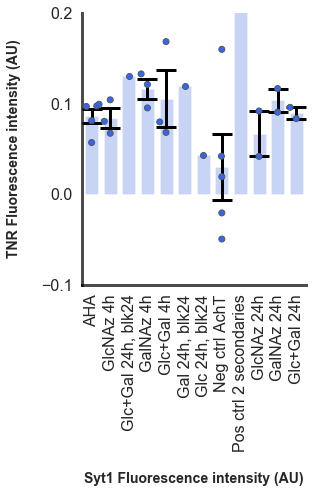

In [47]:
sns.set(font_scale=2.5)
sns.set(font="Arial")
sns.set_style("white")
sns.despine()
sns.set_palette("Set2")

var="mean correlation"
fig=plt.figure(figsize=(4,5))
#order=['2hrs','4hrs','12hrs','No Blocking']
#palette ={"No Blocking":"gray","2hrs":"magenta","4hrs":"magenta","12hrs":"magenta"}

g=sns.swarmplot(x="Protein",y=var,
                data=newdf,size=6,color="#2F67F8",linewidth=1)

g=sns.barplot(x="Protein",y=var,
                data=newdf,alpha=0.3,ci=None,color="#2F67F8")

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(g, .7)

plt.errorbar(x=np.arange(0,len(newdf["Protein"].unique())),
             y=[newdf[newdf["Protein"]==protein][var].mean() for protein in newdf["Protein"].unique()],
             yerr=[newdf[newdf["Protein"]==protein][var].sem() for protein in newdf["Protein"].unique()],
             xerr=None,ecolor='black',fmt='none',capsize=10,linewidth=3,capthick=3)


#scale_y=1/100
#ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
#g.yaxis.set_major_formatter(ticks_y)
g.set_ylabel('TNR Fluorescence intensity (AU)',size=14,weight ='bold',labelpad=20)
g.set_xlabel('Syt1 Fluorescence intensity (AU)',size=14,weight ='bold',labelpad=20)
plt.xticks(g.get_xticks(),size=16,rotation=45)
plt.yticks(g.get_yticks(),size=16)
g.grid(False)

sns.despine(ax=g,right=True,top=True)
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(3)
  g.spines[axis].set_color('black')
  g.spines[axis].set_alpha(.7)



plt.xticks(rotation=90)
plt.ylim([-0.1,0.2])

In [38]:
newdf[newdf["Protein"]=="AHA"]

,filename,exp condition,mean correlation,correlation,Protein
0,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/C...,TIF_imp,0.156488,"[0.22096, -0.034862, -0.19828, 0.031605, 0.210...",AHA
7,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/C...,TIF_imp,0.131412,"[0.7937, 0.42314, 0.055488, -0.074451, 0.08289...",AHA
8,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/C...,TIF_imp,0.125122,"[0.085342, -0.18483, -0.28694, -0.44752, 0.417...",AHA
9,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/C...,TIF_imp,0.080888,"[-0.40392, 0.093432, -0.085825, 0.55047, -0.42...",AHA
11,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/C...,TIF_imp,0.056737,"[0.16117, 0.18314, 0.40042, 0.33497, -0.13414,...",AHA


In [37]:
newdf[newdf["Protein"]=="AHA"]["filename"].values

array(['/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture_ClickChemistry/20190612_funcatdbco_TNR_analyse/withgreenchannel/aha/TIF_imp/normal_corrs_all.txt',
       '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture_ClickChemistry/20190502_funcatdbco_TNR/sted_withgreenchannel_analyse/01_blocked_aha/TIF_imp/normal_corrs_all.txt',
       '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture_ClickChemistry/20190502_funcatdbco_TNR/sted_withgreenchannel_analyse/02_blocked_aha/TIF_imp/normal_corrs_all.txt',
       '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture_ClickChemistry/20190522_funcatdbco_TNR/withgreenchannel_analyse/aha/TIF_imp/normal_corrs_all.txt',
       '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture_ClickChemistry/20190605_funcatdbco_TNR_analyse/withgreenchannel/funcat/TIF_imp/normal_corrs_all.txt'],
      dtype=object)

In [213]:
for protein in newdf["Protein"].unique():
    dfprot=newdf[newdf["Protein"]==protein]
    
    plt.figure()
    plt.hist(np.mean(dfprot["correlation"]))
    plt.title(protein)

TypeError: operands could not be broadcast together with shapes (698,) (471,) 

<Figure size 432x288 with 0 Axes>

In [214]:
newdf["exp condition"].unique()

array(['20190612_tnr550_blkplus12_tgn38acy2_analyse',
       '20190523_tnr550_intfitc_blockedplus12_stripped',
       '20190605_tnr647blockplus12_int1fitc_contactincy3',
       '20190515_TNR550_Int1beta_stripped_plus12hr',
       '20190515_TNR550_Int1beta_stripped_plus12hr_cs34',
       '20190612_tnr550_blkplus12_rab11acy2',
       '20190612_tnr550_blkplus2_cav1cy2',
       '20190612_tnr647_blkplus12_tgn38acy2',
       '20190522_negctrl_tnrstar580_achtatto647',
       '20190515_tnr550blocked_int1fitcblocked_plus0h_onlysurface_analyse',
       '20190526_tnr550blocked_int1fitcblocked_plus0h_surfaceimaging',
       '20190612_tnr647_blkplus12_intfitc_ctccy3_stripped',
       '20190611__tnr550blocked_int1fitcblocked_vglut635p_ctc1AMCA_plus0h_onlysurface_analyse',
       '20190522_tnr550_blkplus2_cav1cy2_goodparams',
       '20190522_tnr550_blkplus20min_cav1cy2_goodparams',
       '20190505_tnr550_blkplus12_postliveexp_rab11a_goodparams',
       '20190612_tnr647_blkplus12_rab11acy2',
       

In [157]:
np.sum(dfprot["correlation"][0]>0.7)

20

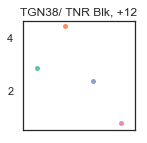

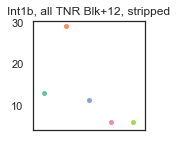

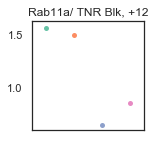

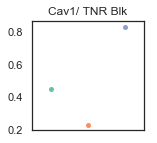

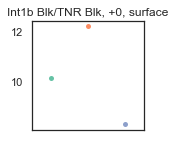

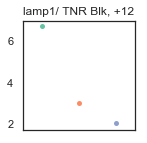

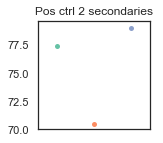

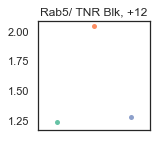

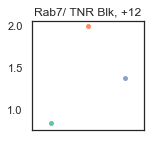

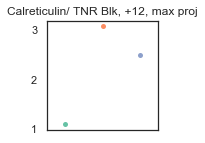

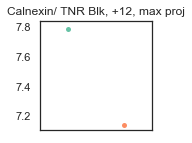

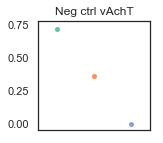

In [244]:
results_allprot={"Protein":[],"expnumber":[],"perc_over":[]}
for protein in newdf["Protein"].unique():
    dfprot=newdf[newdf["Protein"]==protein]
    dfprot=dfprot.reset_index()
    percentages=[]
    expi=[]
    count=1
    for exp in dfprot["exp condition"].unique():
        dfexp=dfprot[dfprot["exp condition"]==exp]
        a=np.sum(dfexp["correlation"].values[0]>0.7)/len(dfexp["correlation"].values[0])*100
        percentages.append(a)
        expi.append(exp)
        results_allprot["Protein"].append(protein)
        results_allprot["expnumber"].append(count)
        results_allprot["perc_over"].append(a)
        count+=1
    plt.figure(figsize=(2,2))
    g=sns.swarmplot(x=expi,y=percentages)
    plt.title(protein)
    plt.xticks(g.get_xticks(),'')
    

In [245]:
df_all=pd.DataFrame(results_allprot)

In [248]:
df_all.to_csv("/Volumes/Macintosh HD/Users/taldankovich/Downloads/allvals.csv'",sep=';')